In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [321]:
data=pd.read_csv('bigmartsalesdata.csv')
test_data=pd.read_csv('bigmarttest.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [322]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [323]:
data.shape

(8523, 12)

In [324]:
test_data.shape

(5681, 11)

In [325]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Check for duplicate data

In [327]:
sum(data.duplicated())

0

There are no duplicate data

#### Check for null values

In [328]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are duplicate data in Item_Weight(1463 records) and Outlet_Size(2410)

In [329]:
categorical_columns=[x for x in data.columns if data[x].dtype=='O']
numerical_columns=[x for x in data.columns if data[x].dtype!='O']

In [330]:
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [331]:
numerical_columns

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

#### Treating the null values

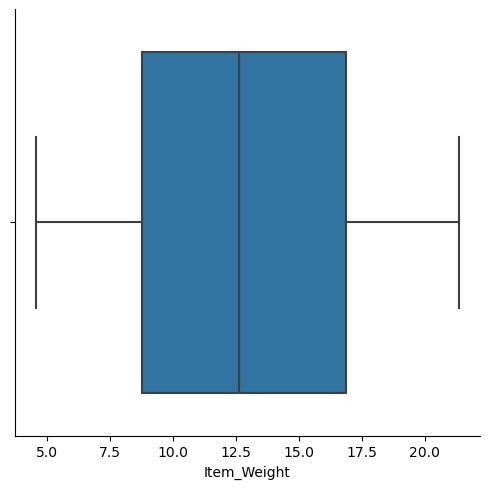

In [332]:
sns.catplot(x='Item_Weight',kind='box',data=data)

#### Since there are no outliers we can use mean imputation for Item_Weight 
#### We can use mode imputation for Outlet Size

In [333]:
mean_item_weight=data['Item_Weight'].mean()
data['Item_Weight'].fillna(mean_item_weight,inplace=True)

In [334]:
mode_outlet_size=data['Outlet_Size'].mode()[0]
data['Outlet_Size'].fillna(mode_outlet_size,inplace=True)

In [335]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [336]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [337]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [338]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Since low fat,LF are same to Low Fat we will replace it

In [339]:
data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [340]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [341]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [342]:
data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [343]:
data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [344]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [345]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [346]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: xlabel='Item_Weight', ylabel='Count'>

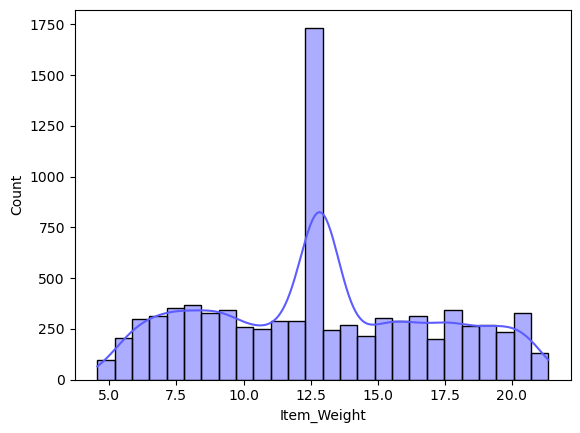

In [347]:
sns.histplot(x='Item_Weight',data=data,color='#5C5CFF',kde=True)

###### Looks like the data is normally distributed and most of the weight of the product is 12.5

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

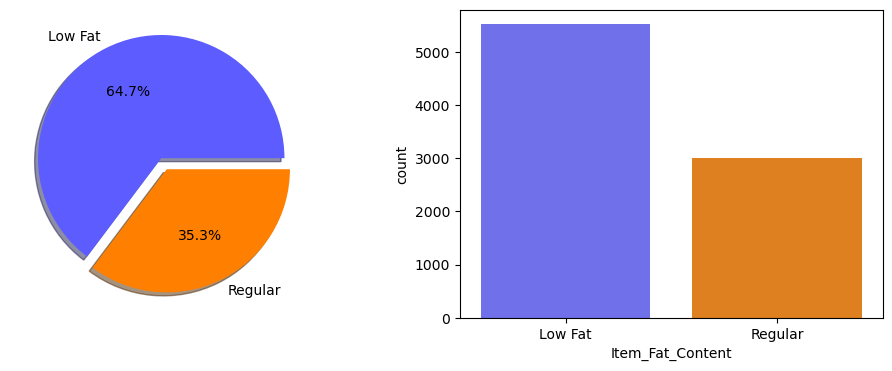

In [348]:
plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
plt.pie(x=data['Item_Fat_Content'].value_counts(),explode=(0.05,0.05),autopct="%1.1f%%",labels=['Low Fat','Regular'],shadow=True,colors=('#5C5CFF','#ff8000'))

plt.subplot(1,2,2)
sns.countplot(x='Item_Fat_Content',data=data,palette=('#5C5CFF','#ff8000'))

#### There are around 64.7% of Low fat items are there more than 5000 items.

<Axes: xlabel='Item_Visibility', ylabel='Count'>

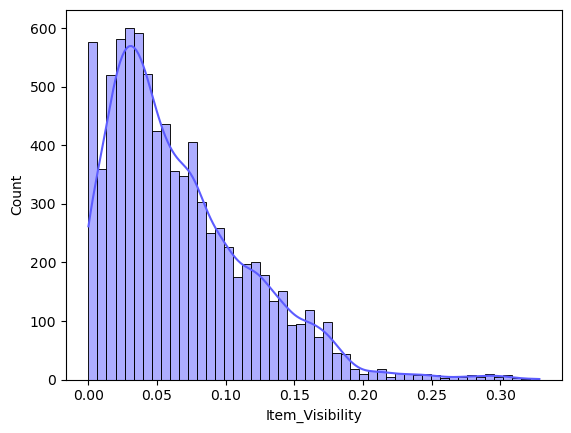

In [349]:
sns.histplot(x='Item_Visibility',data=data,color='#5C5CFF',kde=True)

#### Item Visibility is right skewed and most of the Item visibility has values less than 0.2

<Axes: xlabel='Item_Type', ylabel='count'>

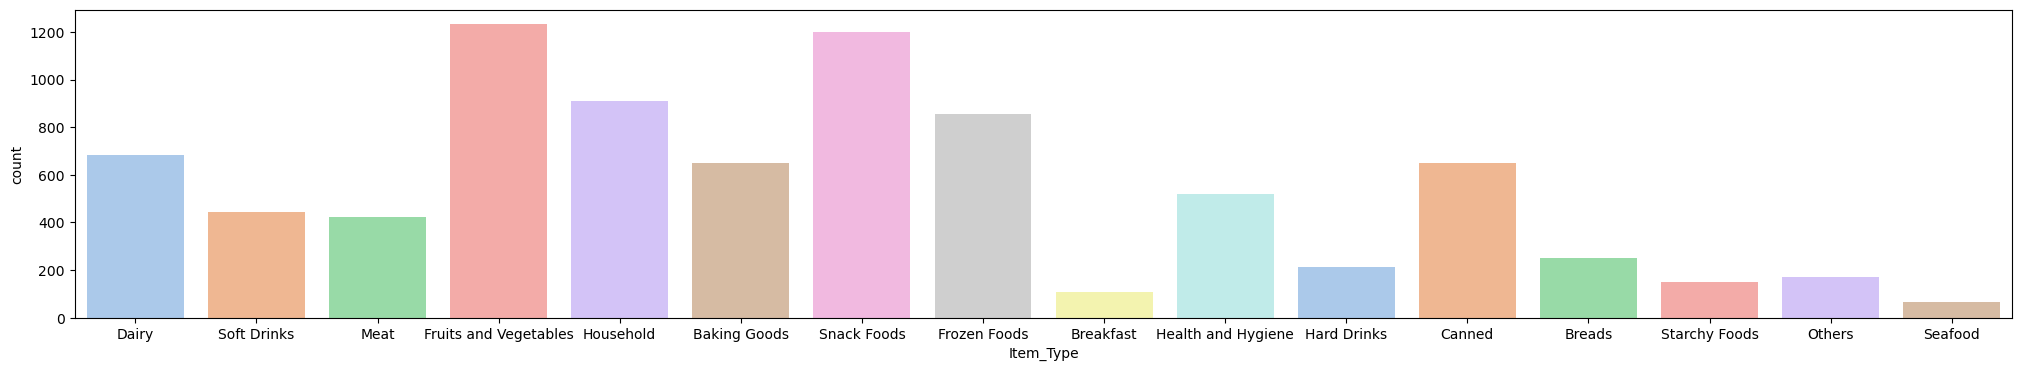

In [350]:
plt.figure(figsize=(25,4))
sns.countplot(x='Item_Type',data=data,palette='pastel')

#### Snack foods , Fruits and Vegetables are item type having more items. Where as Seafood,Breakfasr Starchy foods are the least

<Axes: xlabel='Item_MRP', ylabel='Count'>

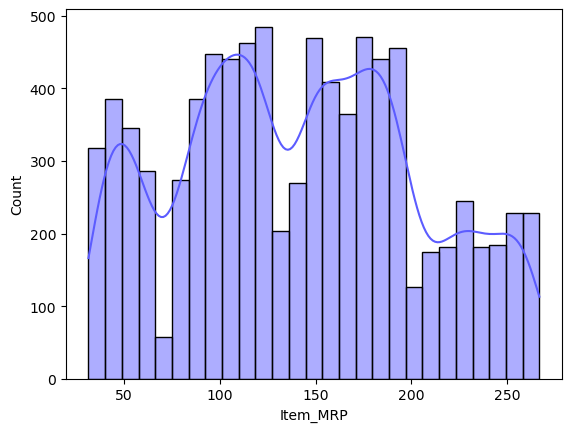

In [351]:
sns.histplot(x='Item_MRP',data=data,color='#5C5CFF',kde=True)

#### With in the range of 75 to 200 MRP most of the items are present

<Axes: xlabel='Outlet_Identifier', ylabel='count'>

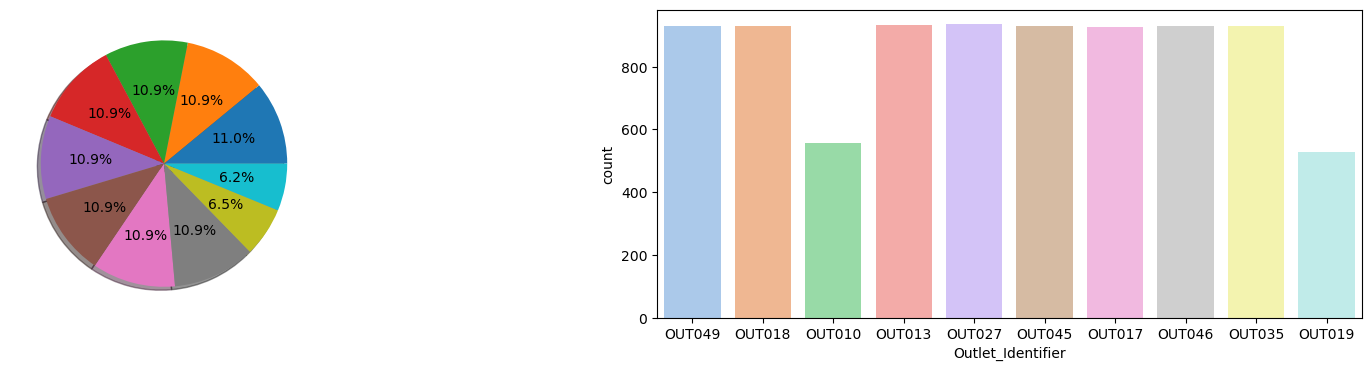

In [352]:
plt.subplots(1,2,figsize=(20,4))
plt.subplot(1,2,1)
plt.pie(x=data['Outlet_Identifier'].value_counts(),autopct="%1.1f%%",shadow=True)

plt.subplot(1,2,2)
sns.countplot(x='Outlet_Identifier',data=data,palette='pastel')

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

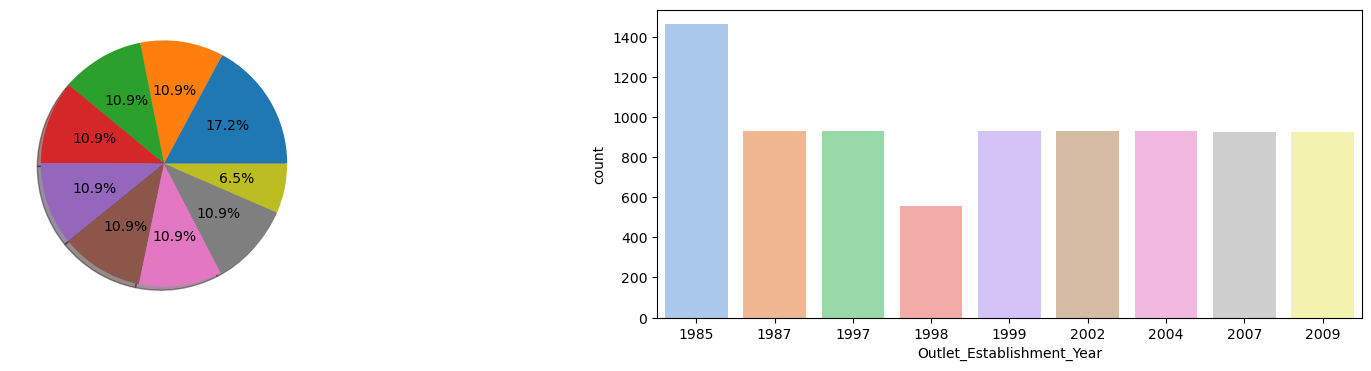

In [353]:
plt.subplots(1,2,figsize=(20,4))
plt.subplot(1,2,1)
plt.pie(x=data['Outlet_Establishment_Year'].value_counts(),autopct="%1.1f%%",shadow=True)

plt.subplot(1,2,2)
sns.countplot(x='Outlet_Establishment_Year',data=data,palette='pastel')

#### In 1985 highest number of outlets have been established where as in the year 1998 least number of outlets have been established

<Axes: xlabel='Outlet_Size', ylabel='count'>

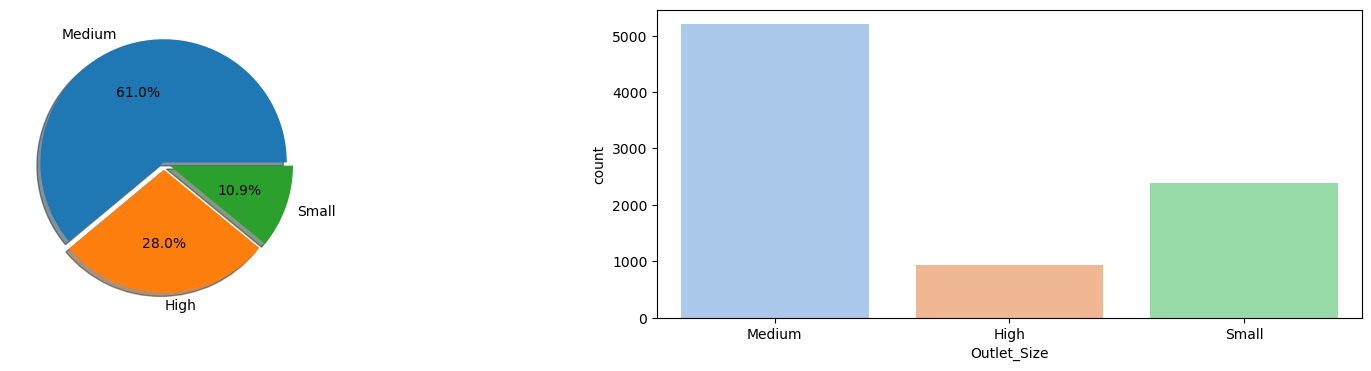

In [354]:
plt.subplots(1,2,figsize=(20,4))
plt.subplot(1,2,1)
plt.pie(x=data['Outlet_Size'].value_counts(),autopct="%1.1f%%",shadow=True,explode=(0.01,0.05,0.05),labels=['Medium','High','Small'])

plt.subplot(1,2,2)
sns.countplot(x='Outlet_Size',data=data,palette='pastel')

#### Most of the outlets are of medium size (61%) followed by High (28%),Small outlets(10.9%)

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

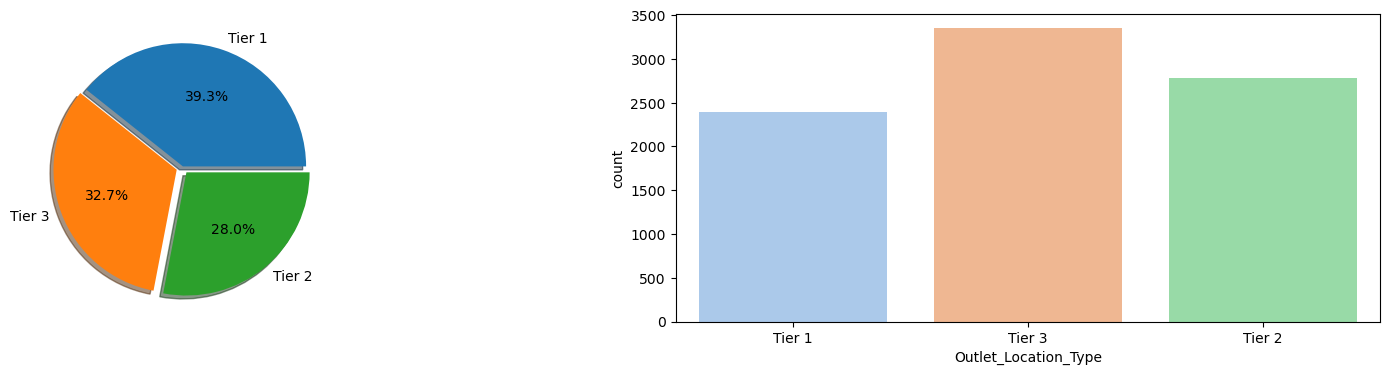

In [355]:
plt.subplots(1,2,figsize=(20,4))
plt.subplot(1,2,1)
plt.pie(x=data['Outlet_Location_Type'].value_counts(),autopct="%1.1f%%",shadow=True,explode=(0.01,0.05,0.05),labels=('Tier 1','Tier 3','Tier 2'))

plt.subplot(1,2,2)
sns.countplot(x='Outlet_Location_Type',data=data,palette='pastel')

#### Highest number of outlets are present in Tier 1 cities (39.3%) followed by Tier 3 cities (32.7%),Tier 2 cities (28%)

<Axes: xlabel='Outlet_Type', ylabel='count'>

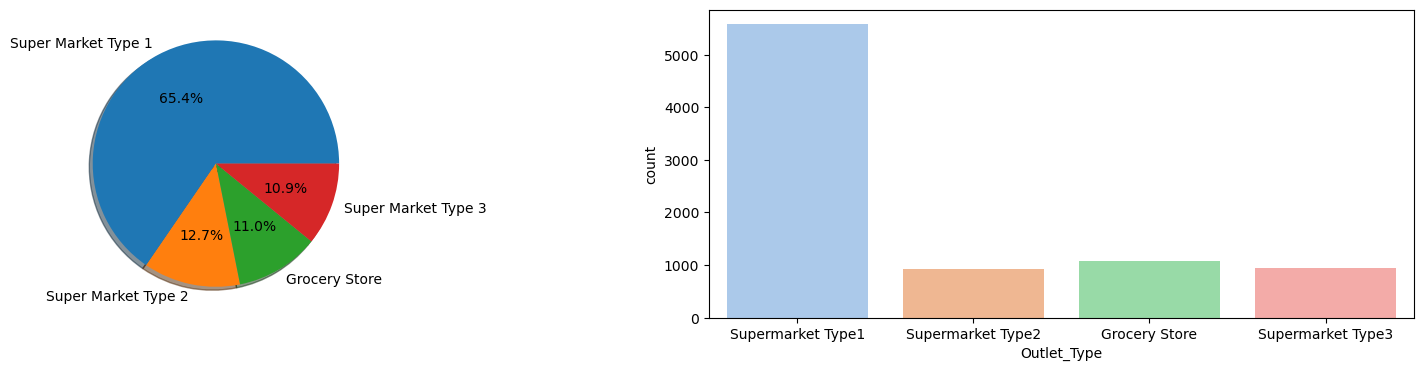

In [356]:
plt.subplots(1,2,figsize=(20,4))
plt.subplot(1,2,1)
plt.pie(x=data['Outlet_Type'].value_counts(),autopct="%1.1f%%",shadow=True,labels=['Super Market Type 1','Super Market Type 2','Grocery Store','Super Market Type 3'])

plt.subplot(1,2,2)
sns.countplot(x='Outlet_Type',data=data,palette='pastel')

#### Most of the outlets are of Super market 1 Type (65.4%) having count more than 5000

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

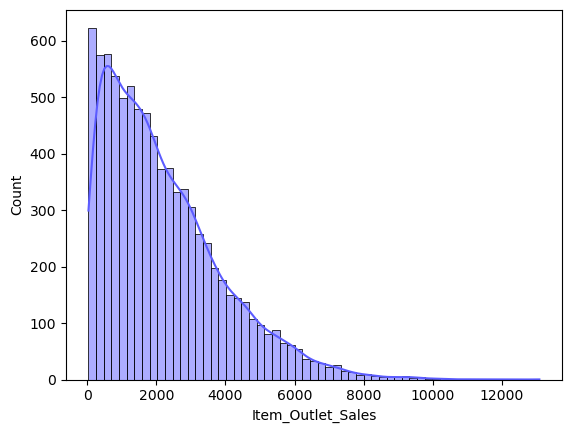

In [357]:
sns.histplot(x='Item_Outlet_Sales',data=data,color='#5C5CFF',kde=True)

In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


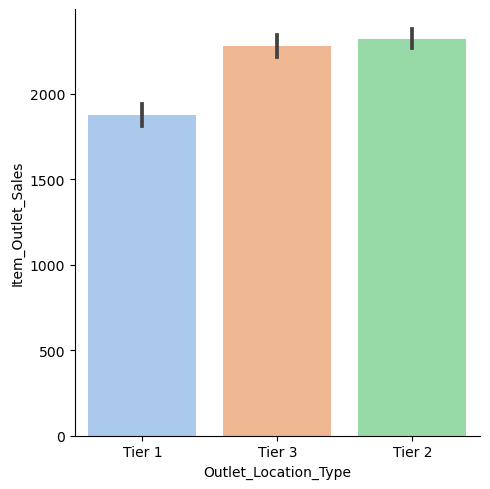

In [359]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',kind='bar',data=data,palette='pastel')

#### Sales are more in Tier 2 cities followed by Tier 3 ,Tier1 we can also note that the sales are almost equal in Tier 3 and Tier 2 cities

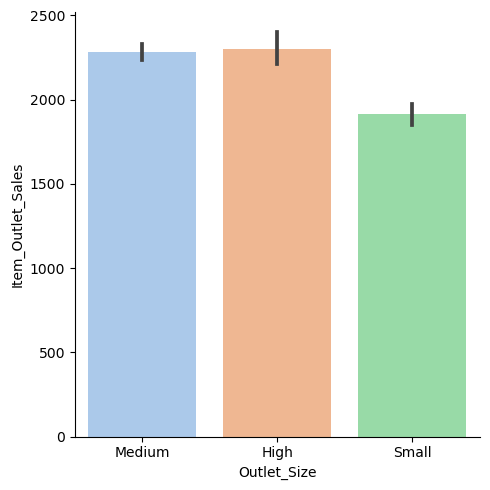

In [360]:
sns.catplot(x='Outlet_Size',y='Item_Outlet_Sales',kind='bar',data=data,palette='pastel')

#### There is almost same sales in Medium and High outlet size. Small size outlets has less sales compared to medium and high

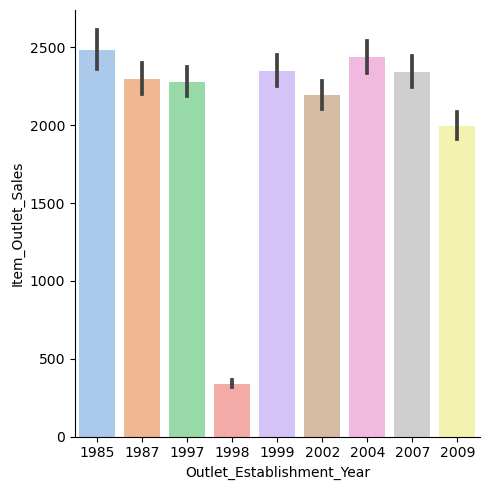

In [361]:
sns.catplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',kind='bar',data=data,palette='pastel')

#### Sales in 1985 is more as more number of outlets are established in the same year.Sales in 1998 is less as less number of outlets are established in the same year.

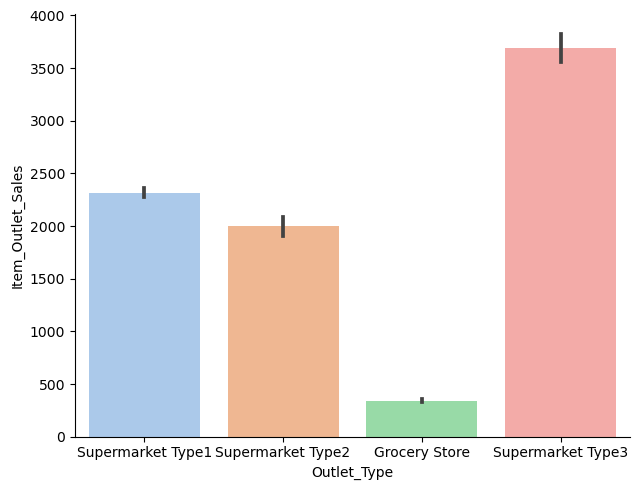

In [362]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',kind='bar',data=data,aspect=1.3,palette='pastel')

#### Super market type 3 has more sales compared to others,Grocery stores has leasts stores

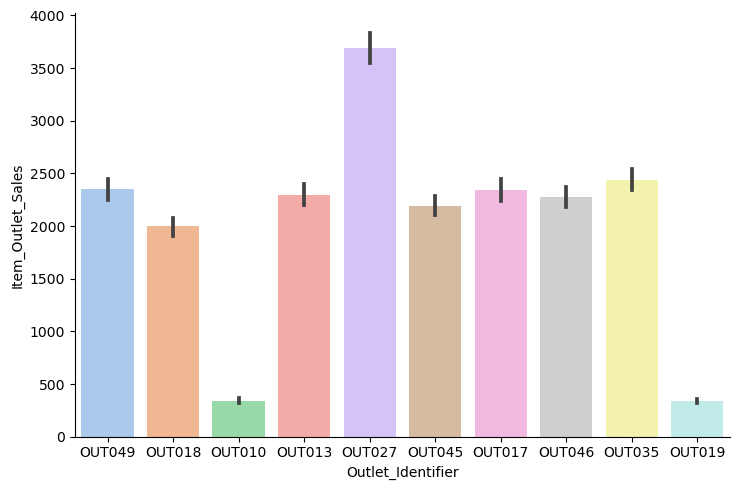

In [363]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',kind='bar',data=data,aspect=1.5,palette='pastel')

#### Outlet OUT027 is the best performing outlet and OUT019 is  the least performing outlet

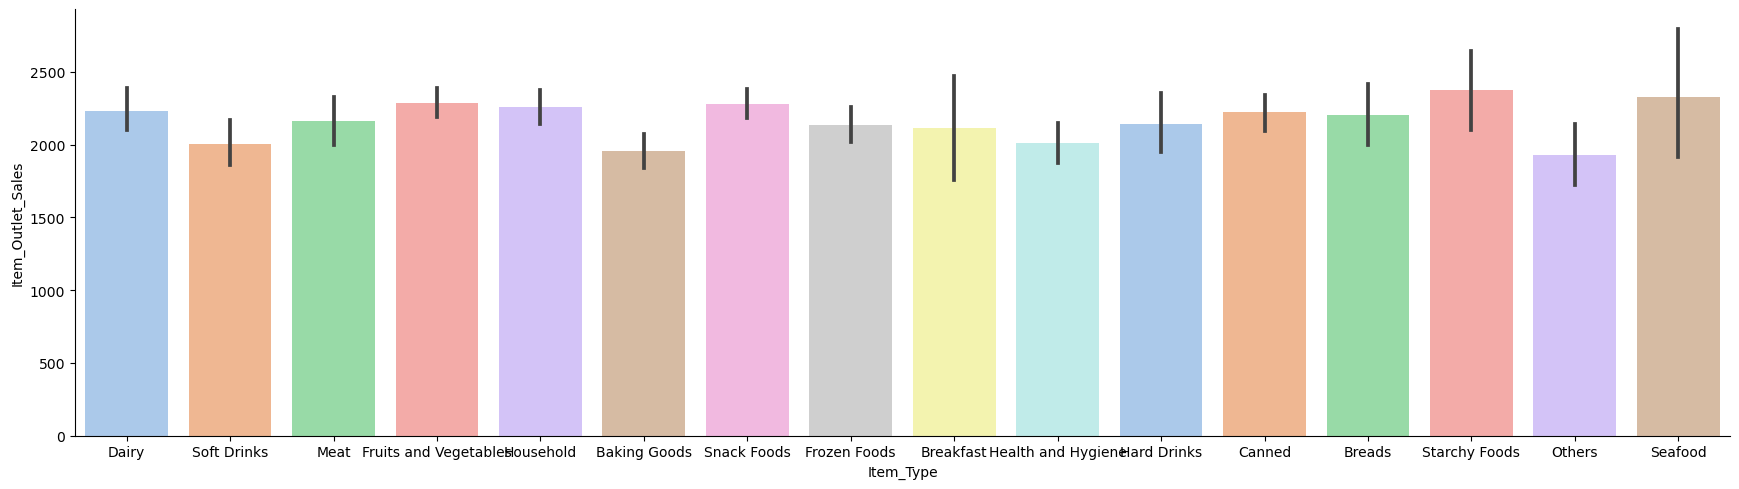

In [364]:
sns.catplot(x='Item_Type',y='Item_Outlet_Sales',kind='bar',data=data,aspect=3.5,palette='pastel')

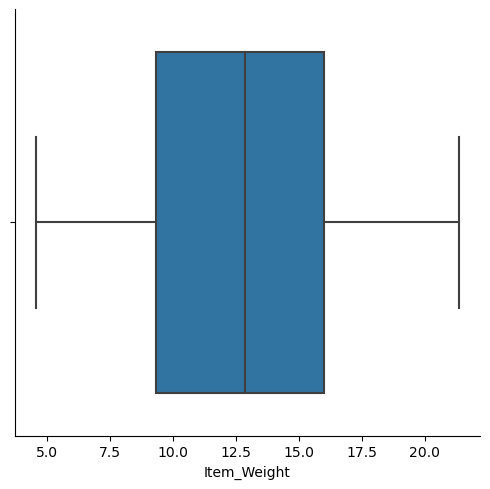

In [365]:
sns.catplot(x='Item_Weight',data=data,kind='box')

#### Item Weight has no outliers

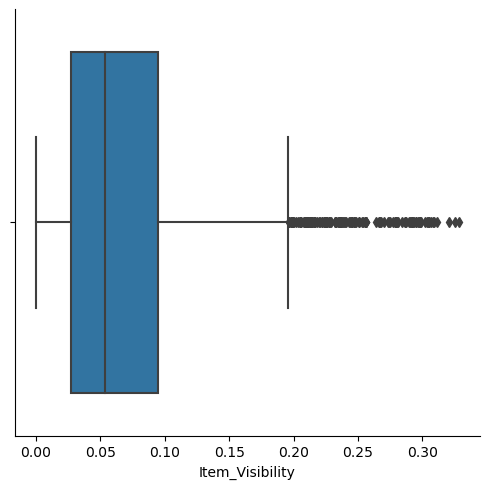

In [366]:
sns.catplot(x='Item_Visibility',data=data,kind='box')

#### ItemMRP has no outliers

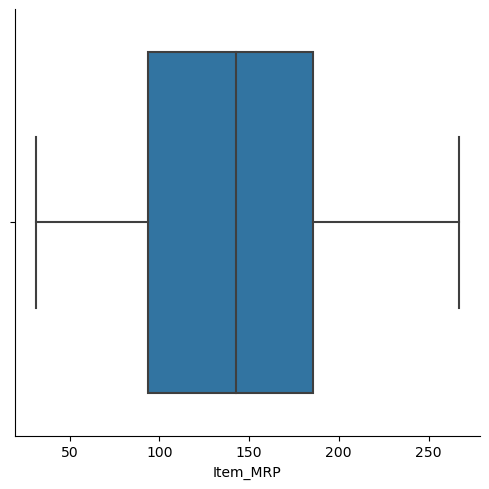

In [389]:
sns.catplot(x='Item_MRP',data=data,kind='box')

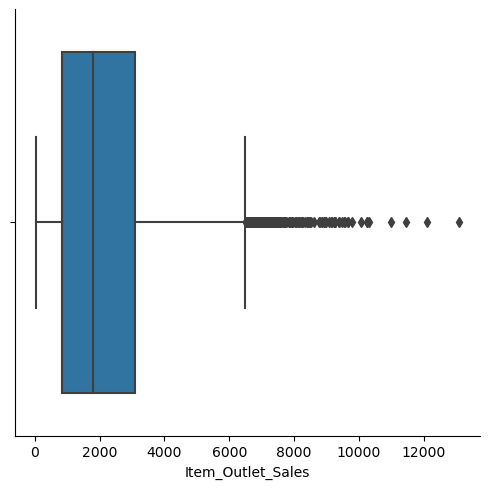

In [368]:
sns.catplot(x='Item_Outlet_Sales',data=data,kind='box')

#### Item Outlet Sales has outliers towards right. (Right skewed data)

In [369]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [370]:
fat_content=data['Item_Fat_Content'].value_counts().to_dict()
data['Item_Fat_Content']=data['Item_Fat_Content'].map(fat_content)

In [371]:
item_type=data['Item_Type'].value_counts().to_dict()
data['Item_Type']=data['Item_Type'].map(item_type)

In [372]:
outlet_identifier=data['Outlet_Identifier'].value_counts().to_dict()
data['Outlet_Identifier']=data['Outlet_Identifier'].map(outlet_identifier)

In [373]:
outlet_size=data['Outlet_Size'].value_counts().to_dict()
data['Outlet_Size']=data['Outlet_Size'].map(outlet_size)

In [374]:
outlet_location_type=data['Outlet_Location_Type'].value_counts().to_dict()
data['Outlet_Location_Type']=data['Outlet_Location_Type'].map(outlet_location_type)

In [375]:
outlet_type=data['Outlet_Type'].value_counts().to_dict()
data['Outlet_Type']=data['Outlet_Type'].map(outlet_type)

In [376]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 799.2+ KB


In [377]:
quantile_25=data['Item_Visibility'].quantile(0.25)
quantile_75=data['Item_Visibility'].quantile(0.75)

In [378]:
IQR=quantile_75-quantile_25
lower_limit=quantile_25-1.5*IQR
upper_limit=quantile_75+1.5*IQR


In [379]:
data=data[data['Item_Visibility']>lower_limit]
data=data[data['Item_Visibility']<upper_limit]

In [380]:
data.drop(['Item_Identifier'],inplace=True,axis=1)

In [381]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,5517,0.016047,682,249.8092,930,1999,5203,2388,5577,3735.1380
1,5.92,3006,0.019278,445,48.2692,928,2009,5203,3350,928,443.4228
2,17.50,5517,0.016760,425,141.6180,930,1999,5203,2388,5577,2097.2700
3,19.20,3006,0.000000,1232,182.0950,555,1998,5203,3350,1083,732.3800
4,8.93,5517,0.000000,910,53.8614,932,1987,932,3350,5577,994.7052


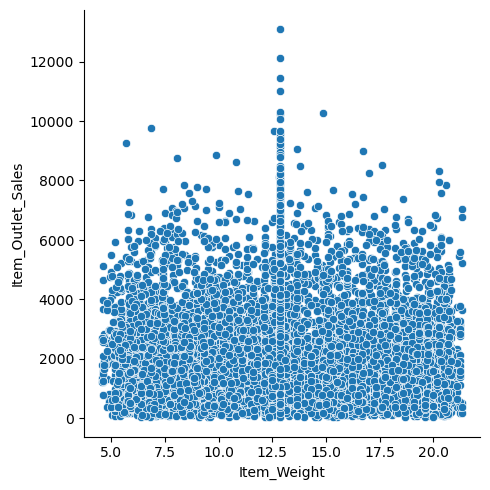

In [382]:
sns.relplot(x=data['Item_Weight'],y=data['Item_Outlet_Sales'],kind='scatter')

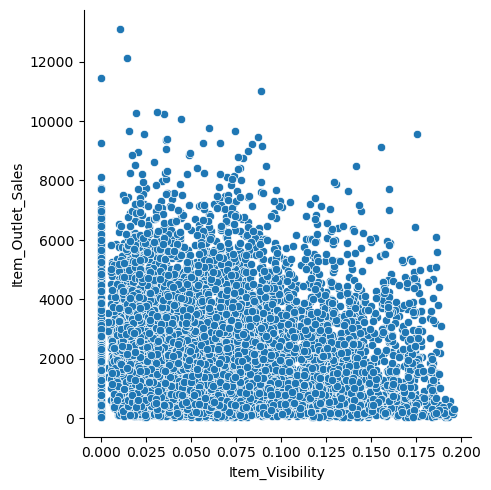

In [383]:
sns.relplot(x=data['Item_Visibility'],y=data['Item_Outlet_Sales'],kind='scatter')

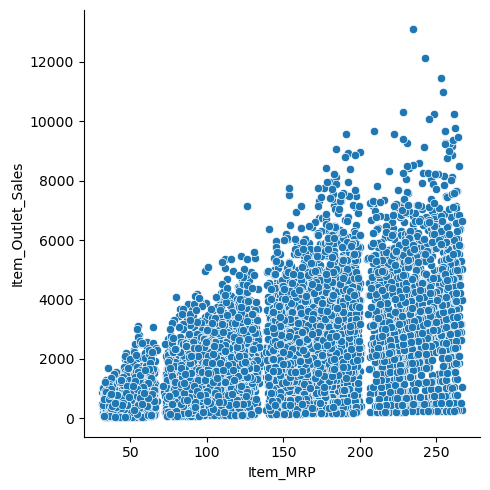

In [384]:
sns.relplot(x=data['Item_MRP'],y=data['Item_Outlet_Sales'],kind='scatter')

<Axes: >

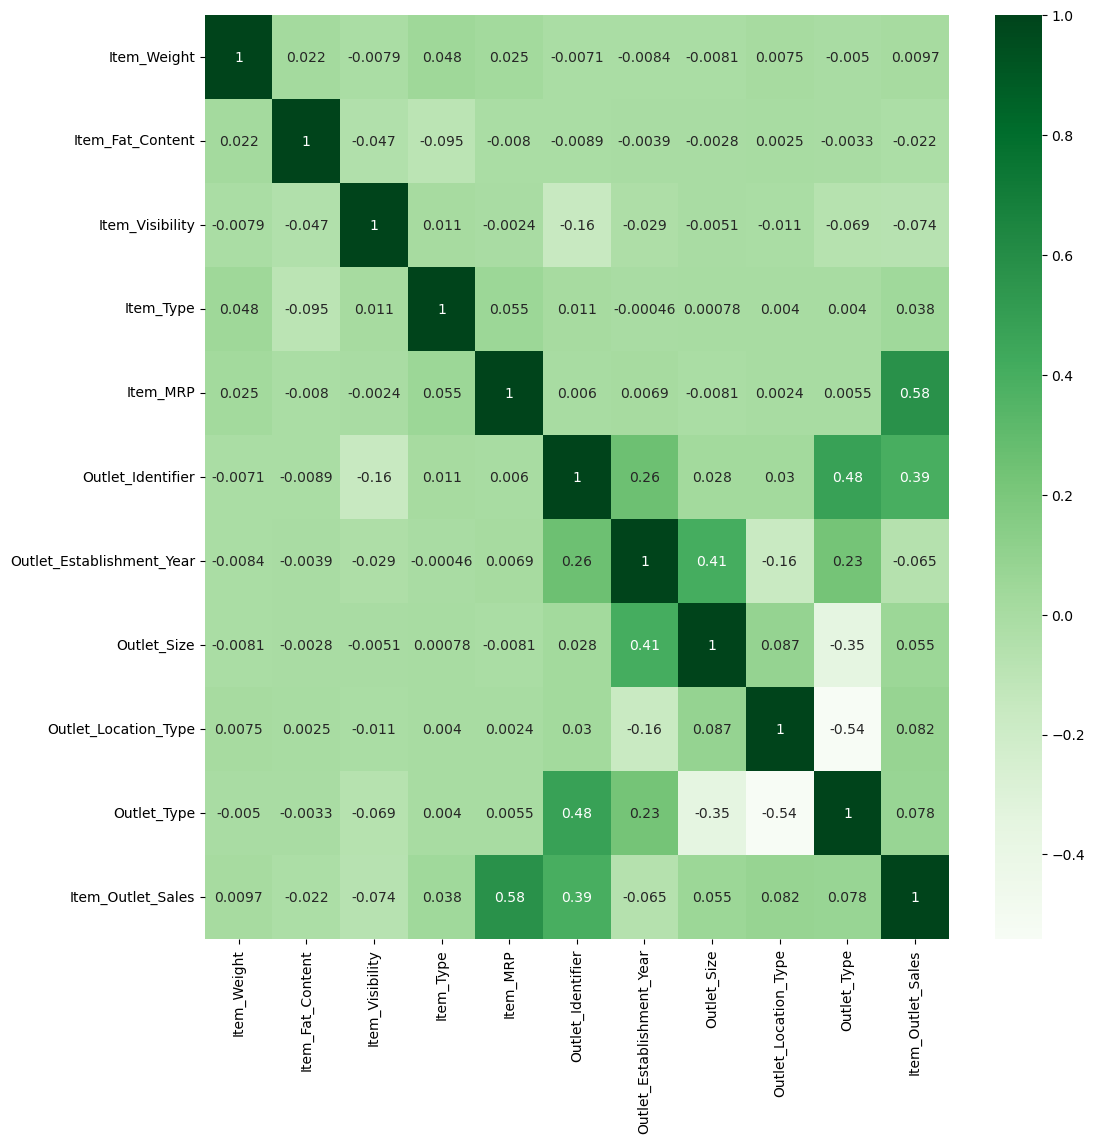

In [385]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [386]:
X=data.drop('Item_Outlet_Sales',axis=1)
Y=data['Item_Outlet_Sales']

In [387]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [388]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=23)

### MODEL BUILDING

In [392]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

##### 1. Linear Regression

In [424]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)
lr_r2_score=r2_score(Y_test,Y_pred_lr)
print('The r2 score for linear regression is {}' .format(lr_r2_score))

The r2 score for linear regression is 0.5271471755784811


##### 2. Lasso Regression

In [426]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=5)
lasso.fit(X_train,Y_train)
Y_pred_lasso=lasso.predict(X_test)
lasso_r2_score=r2_score(Y_test,Y_pred_lasso)
print('The r2 score for lasso regression is {}' .format(lasso_r2_score))

The r2 score for lasso regression is 0.5272747461755685


##### 3. Ridge Regression

In [427]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=5)
ridge.fit(X_train,Y_train)
Y_pred_ridge=ridge.predict(X_test)
ridge_r2_score=r2_score(Y_test,Y_pred_ridge)
print('The r2 score for Ridge regression is {}' .format(ridge_r2_score))

The r2 score for Ridge regression is 0.5271755682537492


#### 4.Decision Tree Regressor

In [428]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
Y_pred_dtr=dtr.predict(X_test)
dtr_r2_score=r2_score(Y_test,Y_pred_dtr)
print('The r2 score for Decision Tree regression is {}' .format(dtr_r2_score))

The r2 score for Decision Tree regression is 0.14326115800970896


##### 5. KNN Regressor

In [453]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
knn_r2_score=r2_score(Y_test,Y_pred_knn)
print('The r2 score for K Nearest Neighbor regression is {}' .format(knn_r2_score))

The r2 score for K Nearest Neighbor regression is 0.5666702324928191


##### 6.Random Forest Regressor

In [454]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,max_samples=300)
rfr.fit(X_train,Y_train)
Y_pred_rfr=rfr.predict(X_test)
rfr_r2_score=r2_score(Y_test,Y_pred_rfr)
print('The r2 score for Random Forest regression is {}' .format(rfr_r2_score))

The r2 score for Random Forest regression is 0.5802751849842362


##### 7. ADABoost Regressor

In [467]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(learning_rate=0.05,n_estimators=100)
ada.fit(X_train,Y_train)
Y_pred_ada=ada.predict(X_test)
ada_r2_score=r2_score(Y_test,Y_pred_ada)
print('The r2 score for ADA Boost regression is {}' .format(ada_r2_score))

The r2 score for ADA Boost regression is 0.5612532924662174


#### 8.XGBoost Regressor

In [477]:
from xgboost import XGBRegressor
xgb=XGBRegressor(learning_rate=0.05,n_estimators=100)
xgb.fit(X_train,Y_train)
Y_pred_xgb=xgb.predict(X_test)
xgb_r2_score=r2_score(Y_test,Y_pred_xgb)
print('The r2 score for XGBoost regression is {}' .format(xgb_r2_score))

The r2 score for XGBoost regression is 0.5654108585974956


In [480]:
[int(x) for x in range(500,2001,500)]

[500, 1000, 1500, 2000]